![logo](./images/OPTIMISE.%20Logo%20(green).png)

This is Notebook 3 out of 4 of this project.

# Optimise.
BUSINESS INTELLIGENCE SOLUTIONS

Optimise. uses data analysis to provide businesses a vision of their present operations and provides them with actionable advise based on meticulous analysis that produces tangible results.   

The analysis focuses on these main areas:     
- Product Analysis
    - Performance
    - Classification
    - Pricing
- Customer Analysis
    - Customer Profile
    - Customer Trends
    - Customer Lifetime Value
- Sales Analysis
    - Date/Time Overview
    - Discount Effeciency
    - Projections
    
The deliverables to be expected are a comprehensive report with useful visualizations, combined with specific recommendations based on the results obtained from the analysis.

# Linear Regression Model

The goal of building a linear regression model is to devise a program that can predict the number of sales given certain parameters. For instance if a developer were to launch a `Single-Player`, `Adventure` game with `Controller Support` at a price of $20 how many copies could he expect to sell. 

This tool could be extremely useful for the company and I would like to add it in the package the company would be receiving.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from IPython.display import clear_output
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
s = pd.read_csv("data/steam_cols_clean.csv")

In [3]:
# grouping boolean columns by type

platforms = ['linux', 'windows', 'mac']
genres = ['Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual',
       'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing']
categories = ['Includes level editor', 'MMO', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local']
tags = ['Nudity', 'Retro', 'Violent', 'Visual Novel', 'RPGMaker', 'Fighting',
       'FPS', 'Female Protagonist', 'Board Game', 'Space', 'World War II',
       'Platformer', 'Anime', 'Great Soundtrack', 'Massively Multiplayer',
       'Open World', 'Sexual Content', 'Arcade', 'Gore', 'Pixel Graphics',
       'Turn-Based', 'Music', 'Fantasy', 'Point & Click', 'Rogue-like',
       'World War I', "Shoot 'Em Up", 'RTS', 'Story Rich', 'Hidden Object',
       'Turn-Based Strategy', 'Survival', 'Match 3', 'Horror', 'Puzzle',
       'Sci-fi', 'Tower Defense', 'VR', 'Management', '2D', 'Card Game',
       'Multiplayer', 'Utilities', 'Shooter', 'War', 'Co-op', 'Zombies',
       'Classic', 'Singleplayer']

In [3]:
s.head(1)

,appid,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,...,Adventure,Includes level editor,MMO,VR Support,Single-player,Controller Support,Online,Multi-Player,co-op,Local
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,...,0,0,0,0,0,0,1,1,0,1


In [4]:
s.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'linux',
       'mac', 'windows', 'Strategy', 'Free to Play', 'Sports', 'Early Access',
       'Racing', 'RPG', 'Action', 'Indie', 'Casual', 'Simulation', 'Adventure',
       'Includes level editor', 'MMO', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'],
      dtype='object')

### Predicted Number of Sales Given a Certain Price

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = s['price'].values.reshape(-1,1)
y = s['owners'].values.reshape(-1,1)

model.fit(x,y)

model.predict(x)

array([[139916.47142944],
       [123148.14261306],
       [123148.14261306],
       ...,
       [123148.14261306],
       [129436.2659192 ],
       [129436.2659192 ]])

In [7]:
score = model.score(x,y)
print("R2:", score)

R2: 0.0009654239594274472


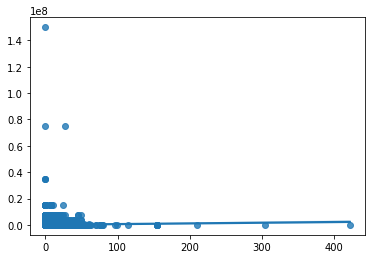

In [8]:
sns.regplot(x,y)

**Observations:** The R2 score is absolutely minimal which means the model is perfectly inadequate to predict the number of sales based on the price. This makes sense since pricing, whilst important, it's not the biggest distinguishing factor among games nor the beggiest determinant of its purchase. 

This model is therefore useless and I shall have to find a more appropirate way of predicting sales.

# Logistical Regression Model

### Predicted Number of Sales

In [9]:
y = pd.get_dummies(data=s['owners'], drop_first=True)
y.head()

,35000,75000,150000,350000,750000,1500000,3500000,7500000,15000000,35000000,75000000,150000000
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


**Observations:** I can already see that this model might also present its problems, since there's a significantly higher number of games that have between 7.500.000 and 15.000.000 owners, only those 2 categories are represented in the dummies data, which means it will only predecit one of these values. The answer is still valid but the the model wouldn't give us more information than getting the mode of onwers per genre.

In [10]:
s[s["owners"]==7500000].count()[0]/len(s)*100

0.1698984302862419

**Observations:** Upon closer observation, I realise that in fact not a majority of the games have 7.500.000 owners, which makes me wonder why the dummies reflect that. 

In [11]:
x = pd.get_dummies(data=s[genres], drop_first=True)
x.head()

,Indie,Sports,Simulation,Strategy,Early Access,Casual,RPG,Free to Play,Adventure,Action,Racing
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [12]:
s["Action"].sum()/len(s)*100

43.963065558633424

**Observations:** Similarly here, the `get_dummies` function seems to be returning interesting results that might affect my model.

#### Approach Number 2
Given the weird results obtained with the `get_dummies` function I have decided to use the data as is instead.

In [13]:
x = s.drop(["appid", "name", "release_date", "developer", "publisher", "owners"], axis=1)
y = s["owners"]

In [14]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
# first model: logistic regression
from sklearn.linear_model import LogisticRegression
 
log_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Get score of the model
score = log_model.score(X_test,y_test)

# Predict using test data
y_pred = log_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

Accuracy score is: 0.7519852262234533
Confusion Matrix:
 [[3676   61    4    2    0    0    0    0    0    0    0    0    0]
 [ 401  159   14    6   11    0    0    0    0    0    1    0    0]
 [ 119  128   37   15   20    0    0    0    0    0    3    2    0]
 [  34   99   31   43   73    2    0    1    1    0    6    1    1]
 [  16   44   22   34  111   10    3    5    4    5    1    0    1]
 [   1    4    2   10   42   12    7    4    2    0    1    0    0]
 [   1    1    0    2   15   17   16    9    1    4    0    1    0]
 [   0    1    0    0    1    8    9   14    3    5    1    0    0]
 [   0    0    0    0    0    1    0    2    2    2    1    0    0]
 [   0    0    0    0    0    0    0    2    0    2    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [17]:
# creating a data frame to compare the original and predicted results
compare = {"original" : y_test,
           "predicted" : log_model.predict(X_test)}

c = pd.DataFrame(compare)

c["success"] = np.where(c["original"]==c["predicted"], 1, 0)
c

,original,predicted,success
3892,35000,10000,0
10836,10000,10000,1
15250,10000,10000,1
6927,75000,35000,0
6810,750000,750000,1
...,...,...,...
16424,10000,10000,1
17513,35000,10000,0
2810,75000,35000,0
692,10000,10000,1


In [18]:
c["success"].sum()/len(c)*100

75.19852262234534

In [ ]:
# Summary 
print("With an accuracy score of", score, "our model has an relatively hight accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

### Predicted Number of Sales per Genre and Price

In [ ]:
# Assign values
x = s.drop(["appid", "name", "release_date", "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'linux', 'mac', 'windows', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'], axis=1)
y = s["owners"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generate the model
genre_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

In [ ]:
# Get score of the model
score = genre_model.score(X_test,y_test)

# Predict using test data
y_pred = genre_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

In [ ]:
print("With an accuracy score of", score, "our model has a medium accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

### Predicted Number of Sales per Category and Price

In [ ]:
# Assign values
x = s.drop(["appid", "name", "release_date", "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'linux', 'mac', 'windows', 'Strategy', 'Free to Play', 'Sports', 'Early Access',
       'Racing', 'RPG', 'Action', 'Indie', 'Casual', 'Simulation', 'Adventure',
       'Includes level editor', 'MMO'], axis=1)
y = s["owners"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generate the model
category_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

In [ ]:
# Get score of the model
score = category_model.score(X_test,y_test)

# Predict using test data
y_pred = category_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

In [ ]:
print("With an accuracy score of", score, "our model has a medium accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

### Predicted Number of Sales per Platform and Price

In [ ]:
# Assign values
x = s.drop(["appid", "name", "release_date", "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local', 'Strategy', 'Free to Play', 'Sports', 'Early Access',
       'Racing', 'RPG', 'Action', 'Indie', 'Casual', 'Simulation', 'Adventure',
       'Includes level editor', 'MMO'], axis=1)
y = s["owners"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generate the model
platform_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

In [ ]:
# Get score of the model
score = platform_model.score(X_test,y_test)

# Predict using test data
y_pred = platform_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

In [ ]:
print("With an accuracy score of", score, "our model has a medium accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

### Predicted Number of Sales per Genre, Category, Platform and Price

In [18]:
# Assign values
x = s.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners'], axis=1)
y = s["owners"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generate the model
all_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

In [19]:
# Get score of the model
score = all_model.score(X_test,y_test)

# Predict using test data
y_pred = all_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

Accuracy score is: 0.6855032317636196
Confusion Matrix:
 [[3698    1    2    0   14    1    0    0    4    7    1]
 [ 275    0    0    0    6    4    2    0    7    0    0]
 [  44    0    0    0    2    3    0    0    0    1    0]
 [   4    0    0    0    2    0    1    0    0    0    0]
 [ 584    0    0    0    8    4    0    0    6    0    0]
 [ 233    0    0    0   13    0    2    0    4    1    0]
 [  24    0    0    0    1    4    1    0    1    1    1]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [ 317    1    0    0   11    1    4    0    4    1    0]
 [  81    0    2    0    4    2    6    0    2    1    0]
 [   9    0    0    0    0    1    0    0    0    0    0]]


In [20]:
print("With an accuracy score of", score, "our model has a medium accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

With an accuracy score of 0.6855032317636196 our model has a medium accuracy as shown in the results
Accurate results: 3698
Missed results: 276


**Observations:** Similarly here, the `get_dummies` function seems to be returning interesting results that might affect my model.

### Case Study: Ubisoft
In this scenario I'm going to build a model that predicts the number of sales given a certain genre, category, platform and price, but only for games published by Ubisoft (one of the top publishers on Steam). This will hopefully produce more consistent results and a better model, since it eliminates the wide range of games that see no success despite having similar parameters.

In [ ]:
# Assign values
x = s[s["publisher"]=="Ubisoft"].drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners'], axis=1)
y = s[s["publisher"]=="Ubisoft"]["owners"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Generate the model
ubisoft_model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

In [ ]:
# Get score of the model
score = all_model.score(X_test,y_test)

# Predict using test data
y_pred = all_model.predict(X_test)

# Generate matrix
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy score is:', score)
print('Confusion Matrix:\n',matrix)

In [ ]:
print("With an accuracy score of", score, "our model has a medium accuracy as shown in the results")
print("Accurate results:", matrix[0][0] + matrix[1][1])
print("Missed results:",  matrix[0][1] + matrix[1][0])

**Observations:** I am surprised at the result. I expected the accuracy of this model to be higher, due too lower variability. However, there are only 111 games published by Ubisoft so the low number of entries might be affecting the model significantly more than anticipated. Or perhaps there's still a lot of variability among games even by the same publisher, and the low number of entris makes it even harder to make proper predictions.

## Creating a Function that Creates a Model
I'm going to change my strategy and instead of trying to create a good model that takes into account all the different features, and then pass said features to predict a result, I'm going to create a function that passes certain features and then build a specific model with those parameters. This will also make it so that the model will have significantly less variables, which is a much more suitable environement for the Logistical Regression Model to work properly.

### Predict Number of Sales based on Genre and Category

In [20]:
def logistic_regression_model(genre, category):
    # Assign values
    x = s[s[genre]==1]
    x = x[x[category]==1]
    #x = x[x["price"]==price]
    x = x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners'], axis=1)
    y = s[s[genre]==1]
    #x = y[y["price"]==price]
    y = y[y[category]==1]["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    print("Accuracy score:", round(score*100, 2), "%")
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    return list(sp.mode(y_pred)[0])[0]

#### Tests / Examples

Category and Genre options:

platforms = `'linux', 'windows', 'mac'`

genres = `'Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual',
       'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing'`
       
categories = `'Includes level editor', 'MMO', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'`

In [21]:
logistic_regression_model("Action", "Local")

Accuracy score: 67.79 %


10000

In [22]:
logistic_regression_model("RPG", "Online")

Accuracy score: 42.73 %


10000

####  Version 2: Goal - Improve accuracy score
The accuracy score of the previous model is not high enough, so I'm going to work on improving my model until it reaches an accuracy of around 90%. The first thing I will be trying is reducing the number of columns that I input in the model by dropping all the unecessary ones.

In [27]:
def logistic_regression_model_2(genre, category):
    # Assign values x
    x = s[s[genre]==1]
    x = x[x[category]==1]
    x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings',
            'negative_ratings', 'average_playtime', 'median_playtime', 'owners', "price"], axis=1, inplace=True)
    x.drop(platforms, axis=1, inplace=True)
    genres_copy = genres.copy()
    genres_copy.remove(genre)
    x.drop(genres_copy, axis=1, inplace=True)
    cat_copy = categories.copy()
    cat_copy.remove(category)
    x.drop(cat_copy, axis=1, inplace=True)
    # Assign values y
    y = s[s[genre]==1]
    y = y[y[category]==1]["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    print("Accuracy score:", round(score*100, 2), "%")
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    return list(sp.mode(y_pred)[0])[0]

In [46]:
logistic_regression_model_2("Action", "Local")

Accuracy score: 69.57 %
[[1566    0    0    0    0    0    0    0    0    0]
 [ 224    0    0    0    0    0    0    0    0    0]
 [ 124    0    0    0    0    0    0    0    0    0]
 [ 128    0    0    0    0    0    0    0    0    0]
 [ 105    0    0    0    0    0    0    0    0    0]
 [  41    0    0    0    0    0    0    0    0    0]
 [  35    0    0    0    0    0    0    0    0    0]
 [  20    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]]


10000

In [34]:
logistic_regression_model_2("Indie", "Local")

Accuracy score: 73.82 %
[[2780    0    0    0    0    0    0    0    0    0]
 [ 407    0    0    0    0    0    0    0    0    0]
 [ 202    0    0    0    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0    0    0    0]
 [ 148    0    0    0    0    0    0    0    0    0]
 [  45    0    0    0    0    0    0    0    0    0]
 [  14    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]]


10000

In [36]:
logistic_regression_model_2("Indie", "Single-player")

Accuracy score: 73.16 %
[[2723    0    0    0    0    0    0    0    0]
 [ 418    0    0    0    0    0    0    0    0]
 [ 209    0    0    0    0    0    0    0    0]
 [ 169    0    0    0    0    0    0    0    0]
 [ 147    0    0    0    0    0    0    0    0]
 [  35    0    0    0    0    0    0    0    0]
 [  11    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


10000

In [39]:
logistic_regression_model_2("Free to Play", "Multi-Player")

Accuracy score: 20.51 %
[[32  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0]]


10000

In [40]:
logistic_regression_model_2("Racing", "Multi-Player")

Accuracy score: 55.32 %
[[52  0  0  0  0  0  0]
 [11  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]]


10000

**Observations:** After running numerous test, my accuracy score hasn't imporved signficantly. Morevoer, I can see that the major problem I have, as shown by the confusion matrix, is that I have too many outcomes. 

What I will attempt to do is check the the amount of games that have each outcome, and reassign the ones that barely have any, and/or group together certain outcomes (number of sales).

In [4]:
s["owners"].unique()

array([ 15000000,   7500000,   3500000,  35000000, 150000000,  75000000,
           35000,    750000,    150000,     75000,   1500000,    350000,
           10000], dtype=int64)

In [5]:
s["owners"].value_counts()

10000        18596
35000         3059
75000         1695
150000        1386
350000        1272
750000         513
1500000        288
3500000        193
7500000         46
15000000        21
35000000         3
75000000         2
150000000        1
Name: owners, dtype: int64

**Observations:** I can see how and why the model was always predicting that the game would receive 10000 views, it's because there's a staggering amount of games that have received that many sales. I can easily see how I can create 3 groups out of these numbers and that will reduce the number of outcomes from 13 to 3, which should give me a significantly higher accuracy, and hopefully we could sometimes obtain a prediction for something other than 10000.

Firstly however, I want to undo a step I did during the data cleaning process, which was to transform the the original sales ranges into an integer by finding the mean of each range. The data type of the target column does not matter for this type of model building so it will fit more nicely I think, to have ranges instead of specific outcomes.

#### Data Cleaning

In [3]:
s["owners"].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [17]:
s["owners"].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [15]:
s["owners"].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [21]:
def reassign_owners(row):
    a = ["20000-50000", "50000-100000", "100000-200000", "200000-500000"]
    b = ["500000-1000000", "1000000-2000000", "2000000-5000000", "5000000-10000000", "10000000-20000000", 
         "20000000-50000000", "50000000-100000000", "100000000-200000000"]
    if row in a:
        row = "20000-500000"
    elif row in b:
        row = "500000+"
    return row

In [25]:
s["owners"] = s["owners"].apply(lambda x: reassign_owners(x))

In [26]:
s["owners"].value_counts()

0-20000         18596
20000-500000     7412
500000+          1067
Name: owners, dtype: int64

#### Trying It  Again

In [30]:
logistic_regression_model_2("Action", "Local")

Accuracy score: 68.99 %
[[1553    0    0]
 [ 573    0    0]
 [ 125    0    0]]


'0-20000'

In [31]:
logistic_regression_model_2("Indie", "Local")

Accuracy score: 72.89 %
[[2745    0    0]
 [ 952    0    0]
 [  69    0    0]]


'0-20000'

In [32]:
logistic_regression_model_2("Indie", "Single-player")

Accuracy score: 73.24 %
[[2726    0    0]
 [ 927    0    0]
 [  69    0    0]]


'0-20000'

In [33]:
logistic_regression_model_2("Free to Play", "Multi-Player")

Accuracy score: 52.56 %
[[ 0 30  0]
 [ 0 82  0]
 [ 0 44  0]]


'20000-500000'

In [34]:
logistic_regression_model_2("Racing", "Multi-Player")

Accuracy score: 54.26 %
[[51  0  0]
 [41  0  0]
 [ 2  0  0]]


'0-20000'

**Observations:** The accurancy scores haven't improved. Upon closer observation at the confusion matrixes, I observe that all the values predicted are always the same. This is due to the massive imbalance in my data set. A big majority of the games will have between 0 and 20.000 sales, which inevitably skews the predictions. 


#### Dealing with Imbalance

In order to build an accurate model that won't be determined by my data set, but will weigh the features independetly of their representaiton, I will rebalance it before running the model.

In [36]:
s["owners"].value_counts()

0-20000         18596
20000-500000     7412
500000+          1067
Name: owners, dtype: int64

In [53]:
# Deal with scaling
majority = s[s['owners'] == "0-20000"]
minority1 = s[s['owners'] == "20000-500000"]
minority2 = s[s['owners'] == "500000+"]
 
# Downsample majority class
minority1_upsampled = resample(minority1, n_samples=len(majority)) #random_state=123
minority2_upsampled = resample(minority2, n_samples=len(majority))

# Combine minority class with downsampled majority class
owners_upsampled = pd.concat([minority1_upsampled, minority2_upsampled, majority])

owners_upsampled['owners'].value_counts()

500000+         18596
20000-500000    18596
0-20000         18596
Name: owners, dtype: int64

In [47]:
def logistic_regression_model_balanced(genre, category):
    # Assign values x
    x = owners_upsampled[owners_upsampled[genre]==1]
    x = x[x[category]==1]
    x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings',
            'negative_ratings', 'average_playtime', 'median_playtime', 'owners', "price"], axis=1, inplace=True)
    x.drop(platforms, axis=1, inplace=True)
    genres_copy = genres.copy()
    genres_copy.remove(genre)
    x.drop(genres_copy, axis=1, inplace=True)
    cat_copy = categories.copy()
    cat_copy.remove(category)
    x.drop(cat_copy, axis=1, inplace=True)
    # Assign values y
    y = owners_upsampled[owners_upsampled[genre]==1]
    y = y[y[category]==1]["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    print("Accuracy score:", round(score*100, 2), "%")
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    return list(sp.mode(y_pred)[0])[0]

#### Tests / Examples

In [48]:
logistic_regression_model_balanced("Action", "Local")

Accuracy score: 37.04 %
[[   0    0 1565]
 [   0    0 1527]
 [   0    0 1819]]


'500000+'

In [49]:
logistic_regression_model_balanced("Indie", "Local")

Accuracy score: 44.2 %
[[2810    0    0]
 [2301    0    0]
 [1247    0    0]]


'0-20000'

In [50]:
logistic_regression_model_balanced("Indie", "Single-player")

Accuracy score: 43.61 %
[[2742    0    0]
 [2298    0    0]
 [1247    0    0]]


'0-20000'

In [51]:
logistic_regression_model_balanced("Free to Play", "Multi-Player")

Accuracy score: 70.96 %
[[  0   0  33]
 [  0   0 233]
 [  0   0 650]]


'500000+'

In [52]:
logistic_regression_model_2("Racing", "Multi-Player")

Accuracy score: 54.26 %
[[51  0  0]
 [40  0  0]
 [ 3  0  0]]


'0-20000'

**Observations:** The accuracy scores have dismished despite improving the model. This further proves that the biggest issue with this model is the huge variability of the data. The sales a game recieves are simply not determined by its genre or category.

However, for the illustrative purposes of this excercise, I will use the model despite it being imperfect. 


# User-Friendly Model
I will now create an user-friendly interface that takes the user's input and build's the model according to the described specifications. 

I will also be adding visual elements to it, and possibily addind the option of having muliple genres and categories.

### Adding Data Visualization

In [37]:
def logistic_regression_model(platform, genre, category):
    # Assign values x
    x = s[s[genre]==1]
    x = x[x[category]==1]
    x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings',
            'negative_ratings', 'average_playtime', 'median_playtime', 'owners', "price"], axis=1, inplace=True)
    platforms_copy = platforms.copy()
    platforms_copy.remove(platform)
    x.drop(platforms_copy, axis=1, inplace=True)
    genres_copy = genres.copy()
    genres_copy.remove(genre)
    x.drop(genres_copy, axis=1, inplace=True)
    cat_copy = categories.copy()
    cat_copy.remove(category)
    x.drop(cat_copy, axis=1, inplace=True)
    # Assign values y
    y = s[s[genre]==1]
    y = y[y[category]==1]["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    print("\nThe expected amounts of sales for this game fall in the range", list(sp.mode(y_pred)[0])[0])
    print("With an accuracy score of", round(score*100, 2), "%")
    #Data Visualization
    return #plt.plot(y_pred)

### Interface

In [36]:
def model():
    print("This model will return the predicted number of sales based on key features like platform, genre, and categories.\n")
    #n = input("How many features do you want to test?")
    print("\nPlatforms:", platforms, "\n")
    platform = input("Choose Platform:\n")
    print("\nGenres:", genres, "\n")
    genre = input("Choose Genre:\n")
    print("\nCategories", categories, "\n")
    category = input("Choose Category:\n")
    result = logistic_regression_model(platform, genre, category)
    return print("\n", result)

In [34]:
model()

This model will return the predicted number of sales based on key features like platform, genre, and categories.


Platforms: ['linux', 'windows', 'mac'] 

Choose Platform:
windows

Genres: ['Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual', 'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing'] 

Choose Genre:
Indie

Categories ['Includes level editor', 'MMO', 'VR Support', 'Single-player', 'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'] 

Choose Category:
Local

The expected amounts of sales for this game falls in the range 0-20000
With an accuracy score of 73.77 %

 ['0-20000' '0-20000' '0-20000' ... '0-20000' '0-20000' '0-20000']


**Observations:** I am happy with the current model, despite its questionable accuracy. However, I still want to take a shot at improving it in the following ways:

1. Making the target binary. Even if this will reduce the usefulness of the result, it will improve the overall performance of the model.
2. Attempting to include developer or publisher in the features being tested. This wasn't done from the start because the unique variables in these categories is unsurmountable high. However, simply by dividing both in 2 groups (more than 10 games vs less than 10 games, for example) could improve the model since developer and publisher do have a significant effect on sales.
3. Try a different model altogether, potentially better fitted for this situation. Namely a Decision Tree.

### Binary
I will be using an upsampling technique to balance out the target data. I will devide this one in 2 groups, `0-20000` and `20000+`.

In [38]:
s["owners"].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [39]:
def reassign_owners_binary(row):
    a = ["20000-50000", "50000-100000", "100000-200000", "200000-500000"]
    b = ["500000-1000000", "1000000-2000000", "2000000-5000000", "5000000-10000000", "10000000-20000000", 
         "20000000-50000000", "50000000-100000000", "100000000-200000000"]
    if row in a:
        row = "20000+"
    elif row in b:
        row = "20000+"
    return row

In [40]:
s["owners"] = s["owners"].apply(lambda x: reassign_owners_binary(x))

In [41]:
s["owners"].value_counts()

0-20000    18596
20000+      8479
Name: owners, dtype: int64

In [43]:
# Deal with scaling
majority = s[s['owners'] == "0-20000"]
minority = s[s['owners'] == "20000+"]
 
# Downsample majority class
minority_upsampled = resample(minority, n_samples=len(majority)) #random_state=123

# Combine minority class with downsampled majority class
owners_upsampled_binary = pd.concat([minority_upsampled, majority])

owners_upsampled_binary['owners'].value_counts()

0-20000    18596
20000+     18596
Name: owners, dtype: int64

In [64]:
def logistic_regression_model_binary(platform, genre, category):
    # Assign values x
    x = owners_upsampled_binary[owners_upsampled_binary[genre]==1]
    x = x[x[category]==1]
    x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings',
            'negative_ratings', 'average_playtime', 'median_playtime', 'owners', "price"], axis=1, inplace=True)
    platforms_copy = platforms.copy()
    platforms_copy.remove(platform)
    x.drop(platforms_copy, axis=1, inplace=True)
    genres_copy = genres.copy()
    genres_copy.remove(genre)
    x.drop(genres_copy, axis=1, inplace=True)
    cat_copy = categories.copy()
    cat_copy.remove(category)
    x.drop(cat_copy, axis=1, inplace=True)
    # Assign values y
    y = owners_upsampled_binary[owners_upsampled_binary[genre]==1]
    y = y[y[category]==1]["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    print("\nThe expected amounts of sales for this game fall in the range", list(sp.mode(y_pred)[0])[0])
    print("With an accuracy score of", round(score*100, 2), "%")
    #Data Visualization
    return 

In [62]:
def model_binary():
    print("This model will return the predicted number of sales based on key features like platform, genre, and categories.\n")
    #n = input("How many features do you want to test?")
    print("\nPlatforms:", platforms, "\n")
    platform = input("Choose Platform:\n")
    print("\nGenres:", genres, "\n")
    genre = input("Choose Genre:\n")
    print("\nCategories", categories, "\n")
    category = input("Choose Category:\n")
    result = logistic_regression_model_binary(platform, genre, category)
    return print("\n", result)

In [65]:
model_binary()

This model will return the predicted number of sales based on key features like platform, genre, and categories.


Platforms: ['linux', 'windows', 'mac'] 

Choose Platform:
windows

Genres: ['Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual', 'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing'] 

Choose Genre:
Action

Categories ['Includes level editor', 'MMO', 'VR Support', 'Single-player', 'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'] 

Choose Category:
Local

The expected amounts of sales for this game fall in the range 0-20000
With an accuracy score of 49.92 %

 None


**Observations:** The accuracy hasn't improved much, and I still can't manage to include a visualization. Underwhelming success.

### Include Developer and Publisher in the Model
In order to do this, I first have to divide each category in 2 groups. Thus I'm first going to explore the data to decide where I should make the division.

In [66]:
s.head(1)

,appid,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,...,Free to Play,Includes level editor,VR Support,Single-player,MMO,Controller Support,Online,Multi-Player,co-op,Local
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,...,0,0,0,0,0,0,1,1,0,1


In [75]:
s["developer"].value_counts()[:10]

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Name: developer, dtype: int64

In [5]:
dev_count = s["developer"].value_counts()
len(dev_count[dev_count>9])/len(dev_count)*100

1.016770875942266

**Observations:** After trying different options I decide that separating developers by those that have made more than 3 games and the rest seems a good split. My top developors now represent only 5% of my data. I might play with this number in the future. Potentially try it when it represents only 1% of the developers and thus have a clear "1% has it all" model.

In [6]:
s["top_developer"] = 0
values = dev_count[dev_count>19].index.tolist()

for w in values:
    for i in range(len(s)):
        if w in s["developer"][i]:
            s["top_developer"][i] = 1
            
s["top_developer"].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    25806
1     1269
Name: top_developer, dtype: int64

In [107]:
s["publisher"].value_counts()[:10]

Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
1C Entertainment        88
Dagestan Technology     88
SEGA                    78
Name: publisher, dtype: int64

In [7]:
dev_count = s["publisher"].value_counts()
len(dev_count[dev_count>16])/len(dev_count)*100

0.996237982443918

In [8]:
s["top_publisher"] = 0
values = dev_count[dev_count>49].index.tolist()

for w in values:
    for i in range(len(s)):
        if w in s["publisher"][i]:
            s["top_publisher"][i] = 1
            
s["top_publisher"].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    24622
1     2453
Name: top_publisher, dtype: int64

### Adjusting the Model

In [9]:
def logistic_regression_model_full(platform, genre, category, developer, publisher):
    # Assign values x
    x = s[s[genre]==1]
    x = x[x[category]==1]
    x = x[x[platform]==1]
    if developer == "yes":
        x = x[x["top_developer"]==1]
    else:
        x = x[x["top_developer"]==0]
    if publisher == "yes":
        x = x[x["top_publisher"]==1]
    else:
        x = x[x["top_publisher"]==0]
    x.drop(["appid", "name", "release_date",'english', "developer", "publisher", 'required_age', 'achievements', 'positive_ratings',
            'negative_ratings', 'average_playtime', 'median_playtime', 'owners', "price"], axis=1, inplace=True)
    platforms_copy = platforms.copy()
    platforms_copy.remove(platform)
    x.drop(platforms_copy, axis=1, inplace=True)
    genres_copy = genres.copy()
    genres_copy.remove(genre)
    x.drop(genres_copy, axis=1, inplace=True)
    cat_copy = categories.copy()
    cat_copy.remove(category)
    x.drop(cat_copy, axis=1, inplace=True)
    # Assign values y
    y = s[s[genre]==1]
    y = y[y[category]==1]
    y = y[y[platform]==1]
    if developer == "yes":
        y = y[y["top_developer"]==1]
    else:
        y = y[y["top_developer"]==0]
    if publisher == "yes":
        y = y[y["top_publisher"]==1]
    else:
        y = y[y["top_publisher"]==0]
    y = y["owners"]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Generate the model
    model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
    # Get score of the model
    score = model.score(X_test,y_test)
    # Predict using test data
    y_pred = model.predict(X_test)
    # Generate matrix
    matrix = confusion_matrix(y_test, y_pred)
    print("\nThe expected amounts of sales for this game fall in the range", list(sp.mode(y_pred)[0])[0])
    print("With an accuracy score of", round(score*100, 2), "%")
    #Data Visualization
    return #plt.plot(y_pred)

In [10]:
def model_full():
    print("This model will return the predicted number of sales based on key features like platform, genre, and categories.\n")
    #n = input("How many features do you want to test?")
    print("\nPlatforms:", platforms, "\n")
    platform = input("Choose Platform:\n")
    print("\nGenres:", genres, "\n")
    genre = input("Choose Genre:\n")
    print("\nCategories", categories, "\n")
    category = input("Choose Category:\n")
    developer = input("Has the developer developed 20 games or more?")
    publisher = input("Has the publisher published 50 games or more?")
    result = logistic_regression_model_full(platform, genre, category, developer, publisher)
    return print("\n", result)

In [12]:
model_full()

This model will return the predicted number of sales based on key features like platform, genre, and categories.


Platforms: ['linux', 'windows', 'mac'] 

Choose Platform:
windows

Genres: ['Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual', 'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing'] 

Choose Genre:
Action

Categories ['Includes level editor', 'MMO', 'VR Support', 'Single-player', 'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local'] 

Choose Category:
Local
Has the developer developed 20 games or more?yes
Has the publisher published 50 games or more?yes

The expected amounts of sales for this game fall in the range 0-20000
With an accuracy score of 70.0 %

 None


**Observations:** I don't see a significant improvement but I can at least feel that my model is more complete. This is as far as I'm going to go improving this given model.

# Decision Tree

# Feature Scaling

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'y_test' is not defined

In [27]:
from sklearn import metrics
 
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba)
 
plt.plot(fpr,tpr)

AttributeError: 'function' object has no attribute 'predict_proba'

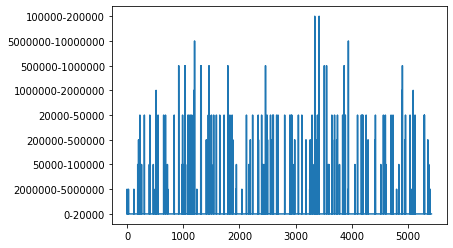

In [54]:
plt.plot(y_pred)